In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
!ls data

kaggle_weather_datasets    nyc_open_datasets
merged_weather_tweets.csv  tweets_scrape_first_df.csv
metrics.png                weather_and_outage.csv
nlp_tweets.csv             working_df.csv
nlp_tweets_2012_2017.csv


In [3]:
df = pd.read_csv('./data/merged_weather_tweets.csv', index_col = 'datetime').drop(columns='Unnamed: 0')

In [4]:
df.shape

(45545, 43)

In [5]:
df.head(2)

,text,regex_clean_tweets,lemmed_tweet,temperature_f,wind_dir_degrees,wind_speed_mph,broken clouds,drizzle,dust,few clouds,...,smoke,snow,squalls,thunderstorm,thunderstorm with heavy rain,thunderstorm with light drizzle,thunderstorm with light rain,thunderstorm with rain,very heavy rain,outage
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-06 13:00:00,Partial power outage at #MediaLoft That's...,Partial power outage MediaLoft That twice week...,Partial power outage MediaLoft That twice week...,61.55,56.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2012-10-12 01:00:00,"Um, can someone call ConEd , there's a power...",Um someone call ConEd power outage Bronx Sourc...,Um someone call ConEd power outage Bronx Sourc...,59.48,260.0,15,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [6]:
df.index = pd.to_datetime(df.index)

In [7]:
# df.index.sort_index

In [8]:
df = df.sort_index()

In [9]:
# df.head()

In [10]:
weather_df = df.drop(columns = ['text', 'regex_clean_tweets', 'lemmed_tweet'])

In [11]:
df.groupby('outage').mean().T

outage,0.0,1.0
temperature_f,53.970204,58.685967
wind_dir_degrees,195.284930,162.395985
wind_speed_mph,6.800764,9.091241
broken clouds,0.141009,0.091241
drizzle,0.004889,0.007299
dust,0.000444,0.001825
few clouds,0.074027,0.058394
fog,0.023735,0.041971
freezing rain,0.000133,0.000000
haze,0.015712,0.012774


In [12]:
# df.groupby('outage').mean().T < 0.5

In [13]:
# df['wind_speed_mph'].groupby(df['outage']).mean()

In [14]:
# df.datetime = pd.to_datetime(df.datetime)

In [15]:
# date_df = df.set_index('datetime').sort_index()

In [16]:
# from bokeh.plotting import figure, show
# from bokeh.io import output_notebook

# output_notebook()

In [17]:
# p = figure(plot_width=400, plot_height=400, x_axis_type="datetime")
# p.line(date_df.index, date_df['temperature_f'])

In [18]:
# show(p)

In [19]:
# date_df.index

In [20]:
# df_13 = date_df[(date_df.index > '2013-01-01') & (date_df.index < '2013-12-31')]

In [21]:
# p13 = figure(plot_width=550, plot_height=400, x_axis_type="datetime")
# p13.line(df_13.index, df_13['temperature_f'])
# show(p13)

In [22]:
# date_df.outage[date_df.outage == 1]

In [23]:
# import seaborn as sns
# plt.figure(figsize = (20, 10))
# sns.lmplot('datetime', 'temperature_f', df, hue='outage', fit_reg=False)
# # fig = plt.gcf()
# # fig.set_size_inches(25, 20)
# # plt.show()

In [24]:
# import seaborn as sns
# plt.figure(figsize = (20, 10))
# sns.lmplot(weather_df.index, 'temperature_f', weather_df, hue='outage', fit_reg=False)
# # fig = plt.gcf()
# # fig.set_size_inches(25, 20)
# # plt.show()

In [25]:
# import seaborn as sns
# plt.figure(figsize = (20, 10))
# sns.lmplot('datetime', 'temperature_f', df, hue='outage', fit_reg=False);
# # fig = plt.gcf()
# # fig.set_size_inches(25, 20)
# # plt.show()

In [26]:
# ax = sns.lineplot(x=date_df.index, y="temperature_f", hue="outage", data=date_df)

In [27]:
weather_df[weather_df['outage'] == 1].index

DatetimeIndex(['2012-10-04 05:00:00', '2012-10-04 10:00:00',
               '2012-10-04 15:00:00', '2012-10-08 15:00:00',
               '2012-10-13 11:00:00', '2012-10-19 03:00:00',
               '2012-10-19 14:00:00', '2012-10-21 00:00:00',
               '2012-10-27 18:00:00', '2012-10-27 18:00:00',
               ...
               '2017-09-05 19:00:00', '2017-09-07 15:00:00',
               '2017-09-09 12:00:00', '2017-09-24 07:00:00',
               '2017-09-29 12:00:00', '2017-10-07 12:00:00',
               '2017-10-12 05:00:00', '2017-10-12 12:00:00',
               '2017-10-13 13:00:00', '2017-10-22 19:00:00'],
              dtype='datetime64[ns]', name='datetime', length=548, freq=None)

In [28]:
weather_df.columns

Index(['temperature_f', 'wind_dir_degrees', 'wind_speed_mph', 'broken clouds',
       'drizzle', 'dust', 'few clouds', 'fog', 'freezing rain', 'haze',
       'heavy intensity drizzle', 'heavy intensity rain', 'heavy snow',
       'heavy thunderstorm', 'light intensity drizzle',
       'light intensity shower rain', 'light rain', 'light rain and snow',
       'light snow', 'mist', 'moderate rain', 'overcast clouds',
       'proximity thunderstorm', 'proximity thunderstorm with drizzle',
       'proximity thunderstorm with rain', 'sand', 'sand/dust whirls',
       'scattered clouds', 'shower rain', 'sky is clear', 'smoke', 'snow',
       'squalls', 'thunderstorm', 'thunderstorm with heavy rain',
       'thunderstorm with light drizzle', 'thunderstorm with light rain',
       'thunderstorm with rain', 'very heavy rain', 'outage'],
      dtype='object')

In [29]:
# weather_df.temperature_f.plot(figsize = (14, 7))
# vlines = weather_df[weather_df['fog'] == 1].index
# for line in vlines:
#     plt.axvline(line, color = 'red')

In [30]:
# dates = date_df.index.to_list()

In [31]:
# outages = date_df.outage.to_list()

In [32]:
# outage_coord = list(zip(dates, outages))

In [33]:
# len(outage_coord)

In [34]:
# x = []
# for i in range(6217):
#     for coordinate in outage_coord:
#         print(coordinate[i])

In [35]:
# outage_coord[0][0]

In [36]:
# outage_coord

In [37]:
one = weather_df[weather_df['outage'] == 1]

In [38]:
zero = weather_df[weather_df['outage'] == 0]

In [39]:
temp_1 = one.loc[:, ['temperature_f']]

In [40]:
temp_0 = zero.loc[:, ['temperature_f']]

In [41]:
weather_df.loc[:, ['outage', 'temperature_f']].head()

,outage,temperature_f
datetime,,
2012-10-01 13:00:00,0.0,59.11
2012-10-01 14:00:00,0.0,59.16
2012-10-01 15:00:00,0.0,59.30
2012-10-01 16:00:00,0.0,59.44
2012-10-01 17:00:00,0.0,59.58


In [42]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


/Users/kevinc/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


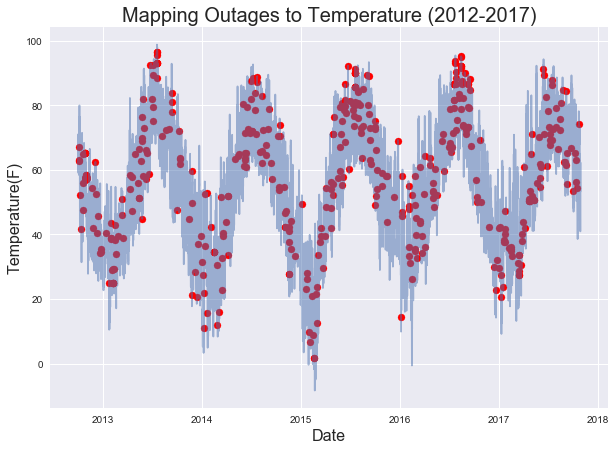

In [43]:
plt.figure(figsize=(10, 7))
plt.plot(weather_df.temperature_f, alpha = 0.5)
plt.scatter(temp_1.index, temp_1['temperature_f'], c ='r')

plt.xlabel('Date', fontsize=16)
plt.ylabel('Temperature(F)', fontsize=16)
plt.title('Mapping Outages to Temperature (2012-2017)', fontsize=20)

plt.savefig('./images/outages_temp.png')

In [44]:
# plt.figure(figsize=(10, 7))
# plt.plot(weather_df.temperature_f, alpha = 0.5)
# plt.scatter(temp_1.index, temp_1['temperature_f'], c ='r')
# vlines = weather_df[weather_df['thunderstorm'] == 1].index
# for line in vlines:
#     plt.axvline(line, color = 'red', alpha = .25)
    
# plt.xlabel('Date', fontsize=16)
# plt.ylabel('Temperature(F)', fontsize=16)
# plt.title('Mapping Outages and Thunderstorms to Temperature (2012-2017)', fontsize=20)

# plt.savefig('./images/outages_temp_thunderstorms.png')

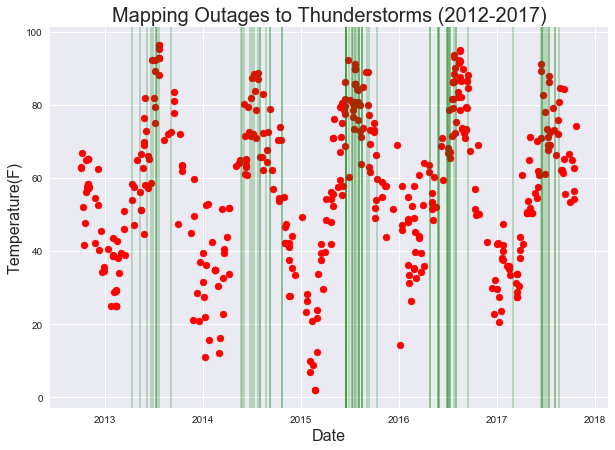

In [45]:
plt.figure(figsize=(10, 7))
# plt.plot(weather_df.temperature_f, alpha = 0.5)
plt.scatter(temp_1.index, temp_1['temperature_f'], c ='r')
vlines = weather_df[weather_df['thunderstorm'] == 1].index
for line in vlines:
    plt.axvline(line, color = 'green', alpha = .25)
    
plt.xlabel('Date', fontsize=16)
plt.ylabel('Temperature(F)', fontsize=16)
plt.title('Mapping Outages to Thunderstorms (2012-2017)', fontsize=20)

plt.savefig('./images/outages_thunderstorms.png')

In [46]:
# plt.figure(figsize=(10, 7))
# plt.plot(weather_df.temperature_f, alpha = 0.5)
# plt.scatter(temp_1.index, temp_1['temperature_f'], c ='r')
# vlines = weather_df[weather_df['thunderstorm'] == 1].index
# for line in vlines:
#     plt.axvline(line, color = 'red', alpha = 0.25)
# s_vlines = weather_df[weather_df['snow'] == 1].index
# for s_line in s_vlines:
#     plt.axvline(s_line, color = 'green', alpha = 0.25)
    
# plt.xlabel('Date', fontsize=16)
# plt.ylabel('Temperature(F)', fontsize=16)
# plt.title('Mapping Outages, Thunderstorms snd Snow to Temperature (2012-2017)', fontsize=20)


# plt.savefig('./images/outages_temp_thunderstorms_snow.png')

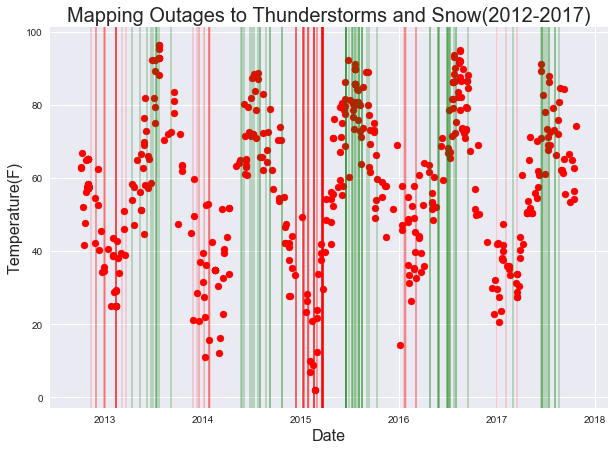

In [47]:
plt.figure(figsize=(10, 7))
# plt.plot(weather_df.temperature_f, alpha = 0.5)
plt.scatter(temp_1.index, temp_1['temperature_f'], c ='r')
vlines = weather_df[weather_df['thunderstorm'] == 1].index
for line in vlines:
    plt.axvline(line, color = 'green', alpha = 0.25)
s_vlines = weather_df[weather_df['snow'] == 1].index
for s_line in s_vlines:
    plt.axvline(s_line, color = 'red', alpha = 0.15)
    
plt.xlabel('Date', fontsize=16)
plt.ylabel('Temperature(F)', fontsize=16)
plt.title('Mapping Outages to Thunderstorms and Snow(2012-2017)', fontsize=20)


plt.savefig('./images/outages_thunderstorms_snow.png')

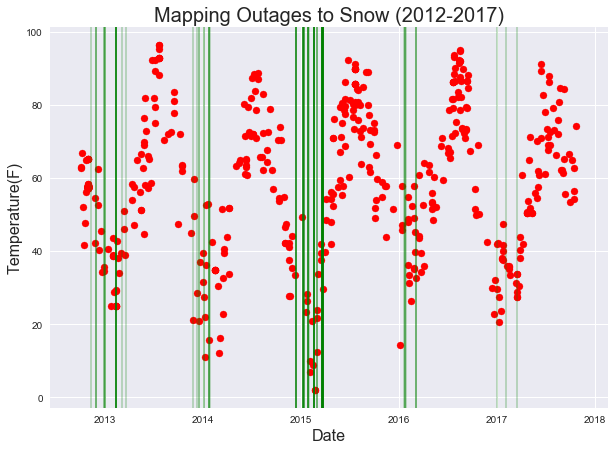

In [48]:
plt.figure(figsize=(10, 7))
# plt.plot(weather_df.temperature_f, alpha = 0.5)
plt.scatter(temp_1.index, temp_1['temperature_f'], c ='r')
vlines = weather_df[weather_df['snow'] == 1].index
for line in vlines:
    plt.axvline(line, color = 'green', alpha = 0.25)
    
plt.xlabel('Date', fontsize=16)
plt.ylabel('Temperature(F)', fontsize=16)
plt.title('Mapping Outages to Snow (2012-2017)', fontsize=20)


plt.savefig('./images/outages_temp_snow.png')

In [49]:
# date_df.temperature_f.resample('M').mean().plot()

In [50]:
# df_15_17 = weather_df[(weather_df.index > '2015-01-01') & (weather_df.index < '2017-12-31')]

In [51]:
# temp_one_15_17 = temp_1[(temp_1.index > '2015-01-01') & (temp_1.index < '2017-12-31')]

In [52]:
# plt.figure(figsize=(10, 7))
# # plt.plot(temp_one_15_17.temperature_f, alpha = 0.5)
# plt.scatter(temp_one_15_17.index, temp_one_15_17['temperature_f'], c ='r')
# vlines = df_15_17[df_15_17['thunderstorm'] == 1].index
# for line in vlines:
#     plt.axvline(line, color = 'green', alpha = 0.25)
    
# plt.xlabel('Date', fontsize=16)
# plt.ylabel('Temperature(F)', fontsize=16)
# plt.title('Mapping Outages to Thunderstorms(2015-2017)', fontsize=20)


# plt.savefig('./images/outages_temp_thunderstorms_15_17.png')

In [53]:
df_15_16 = weather_df[(weather_df.index > '2015-01-01') & (weather_df.index < '2016-12-31')]

In [54]:
temp_one_15_16 = temp_1[(temp_1.index > '2015-01-01') & (temp_1.index < '2016-12-31')]

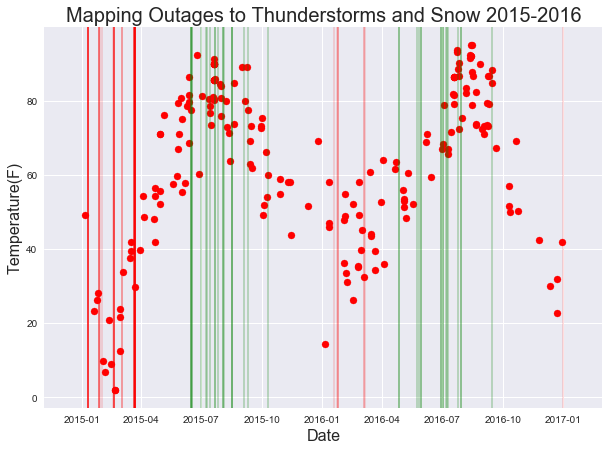

In [55]:
plt.figure(figsize=(10, 7))
# plt.plot(temp_one_15_16.temperature_f, alpha = 0.5)
plt.scatter(temp_one_15_16.index, temp_one_15_16['temperature_f'], c ='r')
vlines = df_15_16[df_15_16['thunderstorm'] == 1].index
for line in vlines:
    plt.axvline(line, color = 'green', alpha = 0.25)
s_vlines = df_15_16[df_15_16['snow'] == 1].index
for s_line in s_vlines:
    plt.axvline(s_line, color = 'red', alpha = 0.15)
    
plt.xlabel('Date', fontsize=16)
plt.ylabel('Temperature(F)', fontsize=16)
plt.title('Mapping Outages to Thunderstorms and Snow 2015-2016', fontsize=20)


plt.savefig('./images/outages_temp_thunderstorms_snow_15_16.png')

In [56]:
wind_1 = one.loc[:, ['wind_speed_mph']]

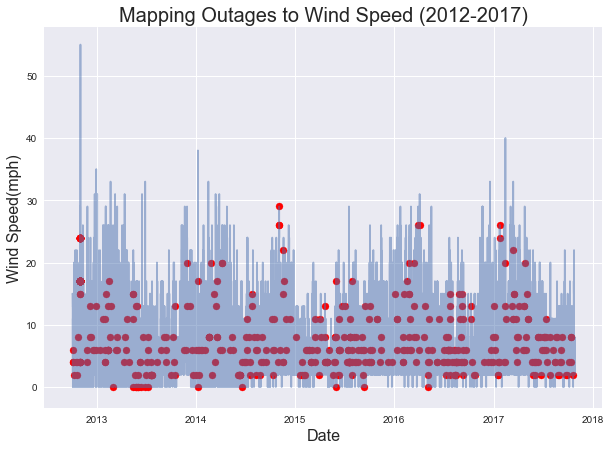

In [57]:
plt.figure(figsize=(10, 7))
plt.plot(weather_df.wind_speed_mph, alpha = 0.5)
plt.scatter(wind_1.index, wind_1['wind_speed_mph'], c ='r')

plt.xlabel('Date', fontsize=16)
plt.ylabel('Wind Speed(mph)', fontsize=16)
plt.title('Mapping Outages to Wind Speed (2012-2017)', fontsize=20)

plt.savefig('./images/outages_wind_speed.png')

In [58]:
# !ls Weather/data

In [59]:
# weather = pd.read_csv('./Weather/data/weather_clean.csv')

In [60]:
# weather.columns

In [61]:
# weather.wind_speed_mph
# weather.head()

In [62]:
# weather.date = pd.to_datetime(weather.date)

In [63]:
# weather = weather.set_index('date').sort_index()

In [64]:
# plt.figure(figsize = (10, 7))

# plt.plot(date_df.wind_speed_mph);
# plt.scatter(wind_1.index, wind_1['wind_speed_mph'], c ='r')


In [65]:
# plt.figure(figsize=(10, 7))

# sns.lineplot(x= date_df.index, y='temperature_f', data=date_df)
# sns.scatterplot(x= temp_1.index, y='temperature_f', data = temp_1)

In [66]:
# one_16 = one['2016']

In [67]:
# temp_16 = temp_1['2016']

In [68]:
# date_df_16 = date_df['2016']

In [69]:
# plt.figure(figsize=(10, 7))
# plt.plot(temp_16.temperature_f, alpha = 0.5)
# plt.scatter(temp_16.index, temp_16['temperature_f'], c ='r')
# vlines = date_df_16[date_df_16['thunderstorm'] == 1].index
# for line in vlines:
#     plt.axvline(line, color = 'red')
    
# plt.xlabel('Date', fontsize=16)
# plt.ylabel('Temperature(F)', fontsize=16)
# plt.title('Mapping Outages and Thunderstorms to Temperature (2015-2017)', fontsize=20)


# # plt.savefig('./images/outages_temp_thunderstorms_15_17.png')

In [70]:
# one_16['2016-07']

In [71]:
# one.resample('M').mean()

In [72]:
# one['outage'].value_counts()

In [73]:
# one['2016-07']

In [74]:
years = ['2012', '2013', '2014', '2015', '2016', '2017']
months = ['01','02','03','04','05','06','07','08','09','10','11','12']

In [75]:
# one['Month/Year'] = one['Timestamp']apply(lambda x: "%d/%d" % (x.month, x.year))

In [76]:
lst_df_year = []
for year in years:
    lst_df_year.append(weather_df[year])

In [77]:
lst_df_ones = []
for i in range(6):
    for column in weather_df.columns:
        lst_df_ones.append(lst_df_year[i][lst_df_year[i][column]==1])

In [78]:
len(lst_df_ones)

240

In [79]:
len(weather_df.columns)

40

In [80]:
# len(lst_df_ones[0])

In [81]:
sub_dfs =[]
for df in lst_df_ones:
    sub_dfs.append(weather_df.index.month.value_counts().sort_index())

In [82]:
# [weather_df['2012-11-10']['drills/exercises'] == 1]

In [83]:
sub_dfs

[1     3731
 2     3438
 3     3737
 4     3611
 5     3740
 6     3622
 7     3781
 8     3736
 9     3606
 10    4908
 11    3909
 12    3726
 Name: datetime, dtype: int64, 1     3731
 2     3438
 3     3737
 4     3611
 5     3740
 6     3622
 7     3781
 8     3736
 9     3606
 10    4908
 11    3909
 12    3726
 Name: datetime, dtype: int64, 1     3731
 2     3438
 3     3737
 4     3611
 5     3740
 6     3622
 7     3781
 8     3736
 9     3606
 10    4908
 11    3909
 12    3726
 Name: datetime, dtype: int64, 1     3731
 2     3438
 3     3737
 4     3611
 5     3740
 6     3622
 7     3781
 8     3736
 9     3606
 10    4908
 11    3909
 12    3726
 Name: datetime, dtype: int64, 1     3731
 2     3438
 3     3737
 4     3611
 5     3740
 6     3622
 7     3781
 8     3736
 9     3606
 10    4908
 11    3909
 12    3726
 Name: datetime, dtype: int64, 1     3731
 2     3438
 3     3737
 4     3611
 5     3740
 6     3622
 7     3781
 8     3736
 9     3606
 10    4908
 11    390

In [84]:
one_2012 = sub_dfs[0:57]
one_2013 = sub_dfs[57:114]
one_2014 = sub_dfs[114:171]
one_2015 = sub_dfs[171:228]
one_2016 = sub_dfs[228:285]
one_2017 = sub_dfs[285:342]

In [85]:
type(years)

list

In [86]:
df_years = []
for year in years:
    df_years.append(one[year])

In [87]:
# df_years[0]

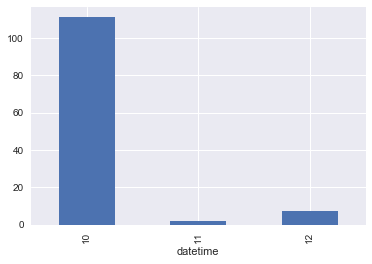

In [88]:
df_years[0].groupby(df_years[0].index.month).count()['outage'].plot(kind = 'bar');

In [89]:
#

In [90]:
df_years[0].groupby(df_years[0].index.month).count()['outage']

datetime
10    111
11      2
12      7
Name: outage, dtype: int64

In [91]:
df_years[1].groupby(df_years[1].index.month).count()['outage']

datetime
1      6
2     12
3      3
4      5
5     12
6      6
7     12
8      2
9      5
10     4
11     4
12     4
Name: outage, dtype: int64

In [92]:
str(df_years[0].index.year.value_counts().index).replace('Int64Index([','').replace("], dtype='int64')", "")

'2012'

In [93]:
label_2012 = ['Oct', 'Nov', 'Dec']
months = ['Jan','Feb','Mar','April','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [94]:
!ls

01_Data_Gathering.ipynb
02.1_Data_Cleaning_Tweets.ipynb
02.2_Data_Cleaning_Weather_and_Outage.ipynb
03_Merge_Weather_and_Tweets.ipynb
Client_Project_John.ipynb
Clustering.ipynb
EDA_Weather_Outage.ipynb
EDA_Weather_Outage_Merged.ipynb
Modeling.ipynb
README.md
data
images
raw_tweets
temporary... delete once all notebooks run without error
tweet


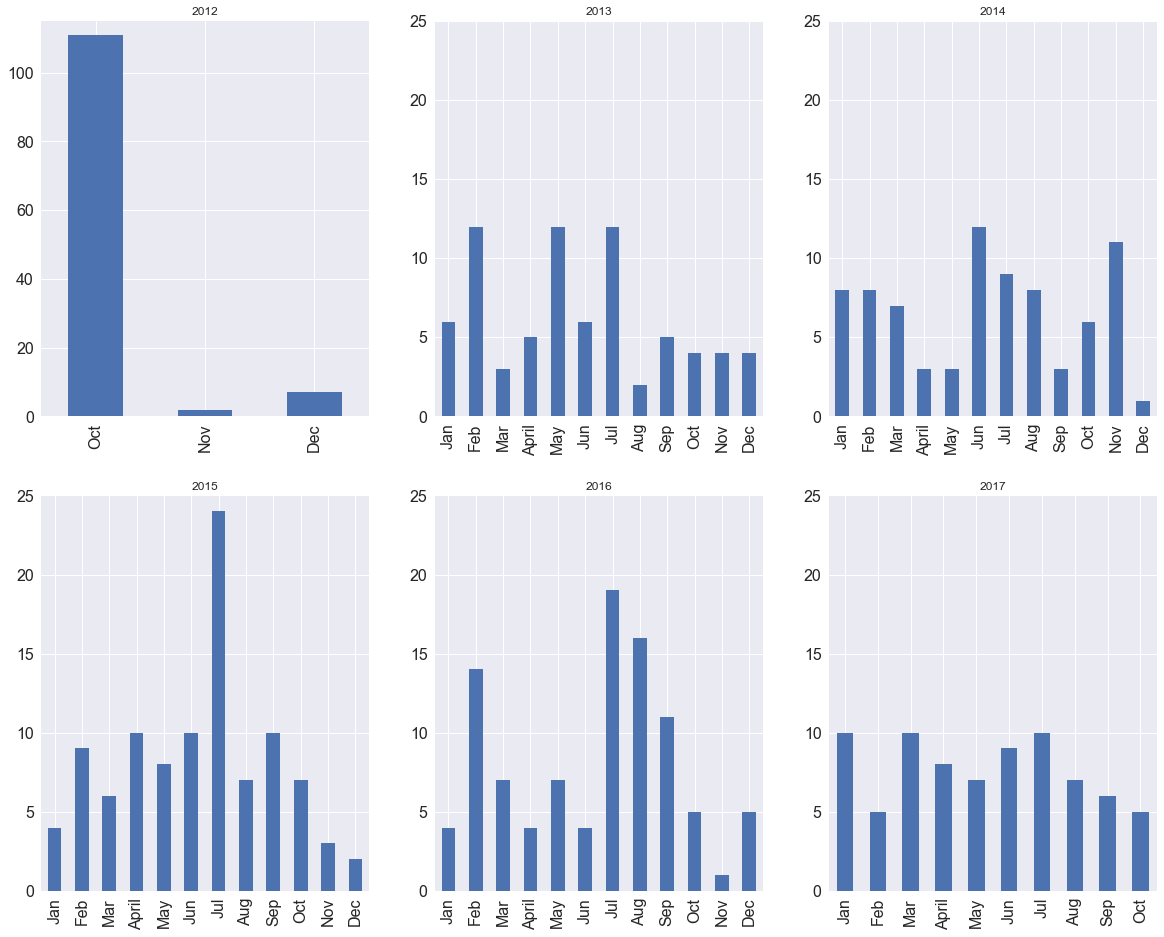

In [95]:
fig, ax = plt.subplots(
    nrows = 2,
    ncols = 3,
    figsize = (20, 16)


)

ax[0][0].set_xticklabels(label_2012)
counter = 0
for i in range(3):

    df_years[i].groupby(df_years[i].index.month).count()['outage'].plot(kind = 'bar',
                                                                        ylim = (0, 25),
                                                                        ax = ax[0][counter],
                                                                        fontsize = 16,
                                                                        title = str(df_years[i].index.year.value_counts().index).replace('Int64Index([','').replace("], dtype='int64')", ""))

    counter += 1

df_years[0].groupby(df_years[0].index.month).count()['outage'].plot(
                                                                    kind = 'bar',
                                                                    ylim = (0, 115),
                                                                    ax = ax[0][0],
                                                                    fontsize = 16,
                                                                    title = str(df_years[0].index.year.value_counts().index).replace('Int64Index([','').replace("], dtype='int64')", ""))
    
counter = 0
for i in range(3,6): 
    df_years[i].groupby(df_years[i].index.month).count()['outage'].plot(kind = 'bar',
                                                                        ylim = (0, 25),
                                                                        ax = ax[1][counter],
                                                                        fontsize = 16,
                                                                        title = str(df_years[i].index.year.value_counts().index).replace('Int64Index([','').replace("], dtype='int64')", ""))
    counter += 1
    
ax[0][0].set_xticklabels(label_2012)
ax[0][0].set(xlabel ='')
# ax[0][0].set(ylabel = 'Outages')

for x in range(1,3):
    ax[0][x].set_xticklabels(months)
    ax[0][x].set_xlabel('')

    
for x in range(0,3):
    ax[1][x].set_xticklabels(months)
    ax[1][x].set_xlabel('')
#    ax[1][0].set_ylabel('Outages')

fig.savefig('./images/subplots_2.png')
# df['temperature_f'].plot(kind = 'hist', 
#                          ax = ax[0], 
#                          title = 'Temperature in Fahrenheit'),

# df['wind_dir_degrees'].plot(kind = 'hist', 
#                          ax = ax[1], 
#                          title = 'Wind Direction (Angle Degrees)');

# df['wind_speed_mph'].plot(kind = 'hist', 
#                          ax = ax[2], 
#                          title = 'Wind Speed in Miles per Hour');

In [96]:
grouped_years = []
for year in range(6):
    grouped_years.append(df_years[year].groupby(df_years[year].index.month).count()['outage'])

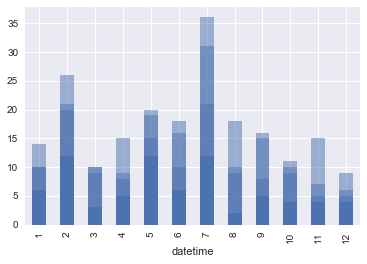

In [97]:
grouped_years[1].plot(kind = 'bar')
grouped_years[2].plot(kind = 'bar', alpha = 0.5, bottom = grouped_years[1])
grouped_years[3].plot(kind = 'bar', alpha = 0.5, bottom = grouped_years[1])
grouped_years[4].plot(kind = 'bar', alpha = 0.5, bottom = grouped_years[1])



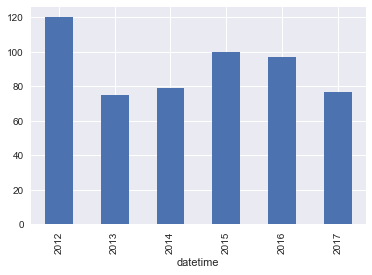

In [98]:
one.groupby(one.index.year).count()['outage'].plot(kind = 'bar')

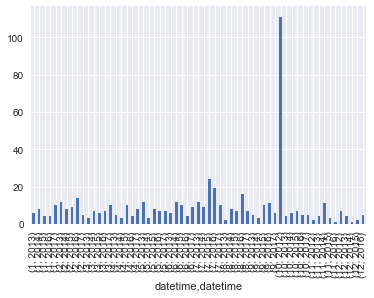

In [99]:
one.groupby([one.index.month, one.index.year]).count()['outage'].plot(kind = 'bar')

In [100]:
one.head()

,temperature_f,wind_dir_degrees,wind_speed_mph,broken clouds,drizzle,dust,few clouds,fog,freezing rain,haze,...,smoke,snow,squalls,thunderstorm,thunderstorm with heavy rain,thunderstorm with light drizzle,thunderstorm with light rain,thunderstorm with rain,very heavy rain,outage
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-04 05:00:00,62.65,30.0,4,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2012-10-04 10:00:00,63.08,330.0,4,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2012-10-04 15:00:00,66.95,40.0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2012-10-08 15:00:00,52.07,0.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2012-10-13 11:00:00,41.65,240.0,4,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


In [101]:
for year in years:
    print(one[year].index.month.value_counts().sort_index())

10    111
11      2
12      7
Name: datetime, dtype: int64
1      6
2     12
3      3
4      5
5     12
6      6
7     12
8      2
9      5
10     4
11     4
12     4
Name: datetime, dtype: int64
1      8
2      8
3      7
4      3
5      3
6     12
7      9
8      8
9      3
10     6
11    11
12     1
Name: datetime, dtype: int64
1      4
2      9
3      6
4     10
5      8
6     10
7     24
8      7
9     10
10     7
11     3
12     2
Name: datetime, dtype: int64
1      4
2     14
3      7
4      4
5      7
6      4
7     19
8     16
9     11
10     5
11     1
12     5
Name: datetime, dtype: int64
1     10
2      5
3     10
4      8
5      7
6      9
7     10
8      7
9      6
10     5
Name: datetime, dtype: int64


In [102]:
pd.DataFrame(one.index.month.value_counts().sort_index(), 
             index = one.index.month.drop_duplicates()).rename(columns = {'datetime': 'outage'})

,outage
datetime,
10,138
11,21
12,19
1,32
2,48
3,33
4,30
5,37
6,41


In [103]:
date_weather_dict = date_df[date_df['thunderstorm'] == 1]['2016'].index.value_counts().sort_index().to_dict()

NameError: name 'date_df' is not defined

In [ ]:
date_weather_dict

In [ ]:
#date_df[date_df['outage'] == 1]['outage']

In [ ]:
# weather_df['temperature_f'].resample('M').mean()

In [ ]:
weather_df['outage'].resample('M').value()